# VGG16-CiFAR-inuk 🚀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.datasets.cifar10 import load_data

## [1] 모델, 데이터 불러오기

In [2]:
tf.random.set_seed(72)

In [3]:
input_shape = (32, 32, 3)

vgg16 = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [5]:
# 스케일링
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [8]:
# flatten 대신 globalaveragepooling 사용
vgg16.trainable = True

model = Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


## [2] 모델 학습

In [10]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [11]:
stop_cb = EarlyStopping(
    patience=5
)

In [12]:
colab_path = "/content/drive/MyDrive/Colab Notebooks"
file_path = colab_path + "/Models/VGG16-CiFAR/VGG16-CiFAR-model-inuk.h5"

model_ckpt_cb = ModelCheckpoint(
    filepath = file_path,
    save_best_only=True
)

In [13]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_steps=2,
    validation_split=0.2,
    callbacks=[model_ckpt_cb],
    batch_size=32
)

Epoch 1/30
1250/1250 [==============================] - 38s 22ms/step - loss: 1.8732 - accuracy: 0.2626 - val_loss: 1.5007 - val_accuracy: 0.4375
Epoch 2/30
1250/1250 [==============================] - 24s 20ms/step - loss: 1.4463 - accuracy: 0.4367 - val_loss: 1.0194 - val_accuracy: 0.6562
Epoch 3/30
1250/1250 [==============================] - 24s 20ms/step - loss: 1.1825 - accuracy: 0.5597 - val_loss: 0.8125 - val_accuracy: 0.7188
Epoch 4/30
1250/1250 [==============================] - 23s 18ms/step - loss: 1.0019 - accuracy: 0.6375 - val_loss: 0.8333 - val_accuracy: 0.7188
Epoch 5/30
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8773 - accuracy: 0.6847 - val_loss: 0.7540 - val_accuracy: 0.7500
Epoch 6/30
1250/1250 [==============================] - 24s 19ms/step - loss: 0.7680 - accuracy: 0.7247 - val_loss: 0.6770 - val_accuracy: 0.8281
Epoch 7/30
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6940 - accuracy: 0.7577 - val_loss: 0.6296 -

## [3] 모델 평가

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.0983 - accuracy: 0.7715


[1.0982588529586792, 0.7714999914169312]

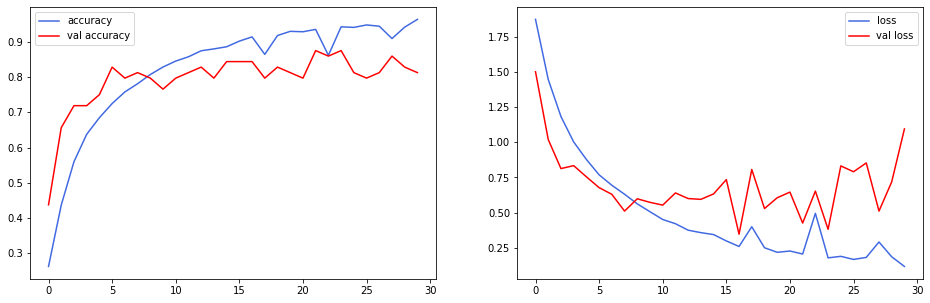

In [15]:
plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
plt.plot(history.epoch, history.history["accuracy"], color="royalblue", label="accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], color="red", label="val accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.epoch, history.history["loss"], color="royalblue", label="loss")
plt.plot(history.epoch, history.history["val_loss"], color="red", label="val loss")
plt.legend()

plt.show()